In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
input_location = "cornering.csv"

In [10]:
def import_data(file_location):
    raw_df = pd.read_csv(f"{file_location}")
    
    df = pd.DataFrame({'Tire': [], 'Spring Rate': [], 'P': [], 'IA': [], 'Nominal Load': [], 'CS': [], 'CSC': [], 'FY-0': []})

    previous_row = []
    for i in range(8):
        if type(raw_df.iloc[0][i]) == str:
            item = raw_df.iloc[0][i].replace(".", "")
            if item.isdigit():
                previous_row.append(float(raw_df.iloc[0][i]))

            else:
                previous_row.append(raw_df.iloc[0][i])
        
        else:
            previous_row.append(raw_df.iloc[0][i])

    new_row = []
    for i in range(1, len(raw_df)):
        new_row.clear()

        for j in range(8):
            new_row.append(raw_df.iloc[i][j])
            
            if type(raw_df.iloc[i][j]) == str:
                item = raw_df.iloc[i][j].replace(".", "")
                if item.isdigit():
                    previous_row.append(float(raw_df.iloc[i][j]))

                else:
                    previous_row.append(raw_df.iloc[i][j])
        
        else:
            previous_row.append(raw_df.iloc[i][j])

        for k in range(len(new_row)):
            if (str(new_row[k]) == "nan") or (new_row[k] == "-      "):
                new_row[k] = previous_row[k]

        df2 = {'Tire': new_row[0], 'Spring Rate': new_row[1], 'P': new_row[2], 'IA': new_row[3], 'Nominal Load': new_row[4], 'CS': new_row[5], 'CSC': new_row[6], 'FY-0': new_row[7]}

        df = df.append(df2, ignore_index = True)

        previous_row = new_row.copy()
    
    return(df)

In [11]:
data = import_data(input_location)

C:\Users\rober\AppData\Local\Temp\ipykernel_3764\1317527368.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\rober\AppData\Local\Temp\ipykernel_3764\1317527368.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\rober\AppData\Local\Temp\ipykernel_3764\1317527368.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\rober\AppData\Local\Temp\ipykernel_3764\1317527368.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)
C:\Users\rober\AppData\Local

In [12]:
def normalized_CS(tire_string, IA, P):

    tire = data[(data["Tire"] == tire_string) & (data["IA"] == IA) & (data["P"] == P)]
    CS = [float(x) for x in tire["CS"].tolist()]
    normal = [float(x) for x in tire["Nominal Load"].tolist()]

    normalized_CS = []

    for i in range(len(CS)):
        normalized_CS.append(CS[i] / normal[i])
    
    return normalized_CS

['Hoosier 18.0 x 6.0 - 10 R25B', 'Hoosier 6.0 / 18.0 - 10 LCO', 'Avon 7.0/16.0-10', 'Hoosier 43075 16x7.5-10 R25B', '10 Hoosier 43070 16x6.0-10 R25B']


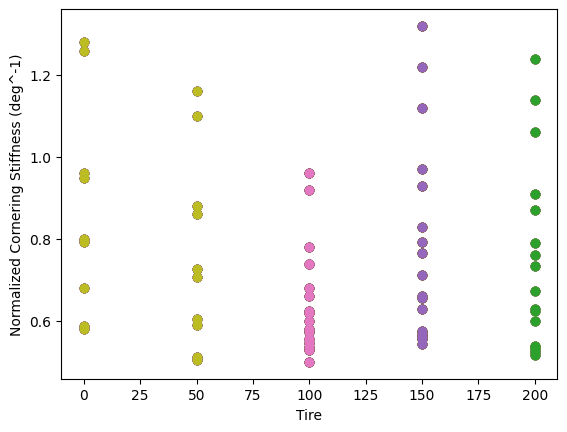

In [14]:
cornering_stiffnesses = []
tire_names = []

for tire in data["Tire"].unique().tolist():

    vals = normalized_CS(tire, 0, 12)

    cornering_stiffnesses.append(vals)
    tire_names.append(tire)

spacing = [x * 50 for x in range(len(cornering_stiffnesses))]

j = -1
for lst in cornering_stiffnesses:
    j += 1
    for i in range(len(lst)):
        x_plot = [j * 50] * len(cornering_stiffnesses[j])

        plt.scatter(x_plot, cornering_stiffnesses[j])

# plt.xticks(spacing, tire_names)
plt.xlabel("Tire")
plt.ylabel("Normalized Cornering Stiffness (deg^-1)")
print(tire_names)